## Use pretrained model
Based on single-cell RNA-seq on cross-clinical subtype pulmonary hypertension lung tissue

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('/home/data/fhz/project/phmap_package')

import scanpy as sc
import phmap


   ____  _   __  __    _    ____  
  |  _ \| | |  \/  |  / \  |  _ \ 
  | |_) | |_| |\/| | / _ \ | |_) |
  |  __/|  _  |  | |/ ___ \|  __/ 
  |_|   |_| |_|  |_/_/   \_\_|    
                                  
  🔬 Multi-task Learning Framework for Cell Type Classifier
  🫁 pretrained model on pulmonary hypertension scRNA-seq data
    
🔖 Version: 0.1.0

🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 4090
   • Total memory: 23.6 GB
   • Compute capability: 8.9
   • CUDA version: 12.1



#### Load model

Use `phmap.load_pretrained_model` to load the multi-task learning pre-trained model. If `model_name` is set to `full_model`, the built-in pre-trained PHMAP model from `phmap` will be used. If you have another model trained based on `phmap`, you can set it to the file path.

In [2]:
model = phmap.load_pretrained_model('full_model')

INFO:phmap.core.classifier:Model loaded from /home/data/fhz/project/phmap_package/phmap/models/full_model/cell_type_classifier_full.pth
INFO:phmap.core.predictor:Model and metadata loaded from /home/data/fhz/project/phmap_package/phmap/models/full_model/cell_type_classifier_full.pth and /home/data/fhz/project/phmap_package/phmap/models/full_model/cell_type_classifier_full_metadata.pkl


#### Test dataset

In [3]:
adata_3k = sc.read_h5ad('phmap/test_data/sampled_adata_1000.h5ad')
adata_3k

AnnData object with n_obs × n_vars = 1000 × 21977
    obs: 'anno_lv1', 'anno_lv2', 'anno_lv3', 'anno_lv4'
    var: 'Symbol', 'ENSEMBL', 'Synonym', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    layers: 'counts'

#### Fast prediction and visualization

In [4]:
%%time
result = phmap.predict(adata = adata_3k, return_probabilities=True)

INFO:phmap.core.classifier:Model loaded from /home/data/fhz/project/phmap_package/phmap/models/full_model/cell_type_classifier_full.pth
INFO:phmap.core.predictor:Model and metadata loaded from /home/data/fhz/project/phmap_package/phmap/models/full_model/cell_type_classifier_full.pth and /home/data/fhz/project/phmap_package/phmap/models/full_model/cell_type_classifier_full_metadata.pkl
INFO:phmap.core.predictor:Loaded default model 'full_model'
INFO:phmap.core.predictor:Prediction completed for 1000 cells


CPU times: user 318 ms, sys: 303 ms, total: 621 ms
Wall time: 618 ms


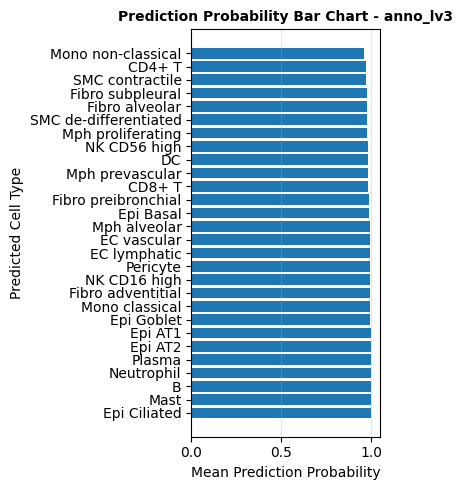

In [5]:
phmap.pl.plot_probability_bar(result, label_columns=['anno_lv3'], figsize=(4, 5), orientation='horizontal')

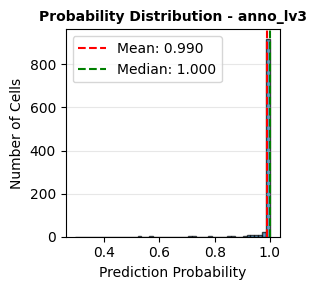

In [6]:
phmap.pl.plot_probability_distribution(result, label_columns=['anno_lv3'], figsize=(3, 3))

#### Add prediction results to `adata.obs`

In [7]:
adata_3k = result.to_adata(adata_3k)
adata_3k.obs.head()

,anno_lv1,anno_lv2,anno_lv3,anno_lv4,predicted_anno_lv1,predicted_anno_lv1_prob,predicted_anno_lv2,predicted_anno_lv2_prob,predicted_anno_lv3,predicted_anno_lv3_prob,predicted_anno_lv4,predicted_anno_lv4_prob
SRX19233503_TCTCTGGTCAGTCAGT,Stromal,Smooth Muscle,SMC de-differentiated,SMC_c3_de-diff_LUM,Stromal,1.00000,Smooth Muscle,1.000000,SMC de-differentiated,1.000000,SMC_c3_de-diff_LUM,0.999851
SC315_AGTTGGTGTGAAGGCT,Myeloid,Monocyte,Mono non-classical,Mono_c2_non-classical_FCGR3A,Myeloid,1.00000,Monocyte,1.000000,Mono non-classical,1.000000,Mono_c2_non-classical_FCGR3A,1.000000
GSM8885794-AAGGGAGGTTAATCCAAACGGGAA-1-8,Endothelial,EC vascular,EC vascular,EC_c3_arterial_DKK2,Endothelial,1.00000,EC vascular,1.000000,EC vascular,1.000000,EC_c3_arterial_DKK2,0.999990
SC315_CCTCAGTCACATTAGC,Epithelial,Epi AT2,Epi AT2,Epi_c2_AT2_SFTPC,Epithelial,0.99416,Epi AT2,0.997091,Epi AT2,0.998274,Epi_c2_AT2_SFTPC,0.999596
SC51_TAGACCATCTGCTGTC,Epithelial,Epi Ciliated,Epi Ciliated,Epi_c4_Ciliated_FOXJ1,Epithelial,1.00000,Epi Ciliated,1.000000,Epi Ciliated,1.000000,Epi_c4_Ciliated_FOXJ1,1.000000


#### Visualization of UMAP and cell markers

In [8]:
sc.pp.normalize_total(adata_3k, target_sum=1e4)
sc.pp.log1p(adata_3k)
sc.pp.highly_variable_genes(adata_3k, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_3k.raw = adata_3k
adata_3k = adata_3k[:, adata_3k.var['highly_variable']].copy()

In [9]:
sc.pp.scale(adata_3k)
sc.tl.pca(adata_3k, svd_solver='arpack')

In [10]:
sc.pp.neighbors(adata_3k, use_rep='X_pca')

In [11]:
sc.tl.umap(adata_3k, min_dist=0.5)

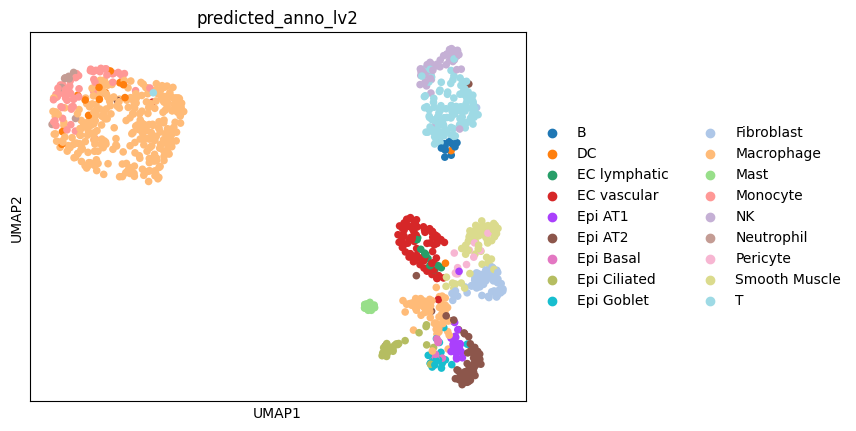

In [40]:
sc.pl.umap(adata_3k, color=['predicted_anno_lv2'])

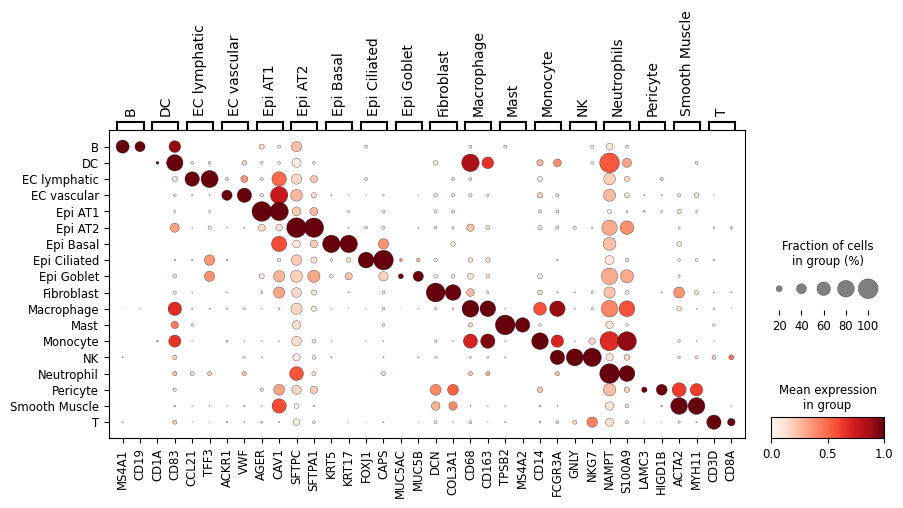

In [ ]:
cell_markers = {
    "B": ["MS4A1", "CD19"],
    "DC": ["CD1A", "CD83"],
    "EC lymphatic": ["CCL21", "TFF3"],
    "EC vascular": ["ACKR1", "VWF"],
    "Epi AT1": ["AGER", "CAV1"],
    "Epi AT2": ["SFTPC", "SFTPA1"],
    "Epi Basal": ["KRT5", "KRT17"],
    "Epi Ciliated": ["FOXJ1", "CAPS"],
    "Epi Goblet": ["MUC5AC", "MUC5B"],
    "Fibroblast": ["DCN", "COL3A1"],
    "Macrophage": ["CD68", "CD163"],
    "Mast": ["TPSB2", "MS4A2"],
    "Monocyte": ["CD14", "FCGR3A"],
    "NK": ["GNLY", "NKG7"],
    "Neutrophils": ["NAMPT", "S100A9"],   
    "Pericyte": ["LAMC3", "HIGD1B"],
    "Smooth Muscle": ["ACTA2", "MYH11"],
    "T": ["CD3D","CD8A"],
}
sc.pl.dotplot(adata_3k, var_names=cell_markers, standard_scale="var", groupby="predicted_anno_lv2", figsize=(10,4))